# 4I-SI3 - Projet Deep Learning

## Auteurs

* JOUDIOUX Alexandre

* DAVY Guillaume

## Objectif

- À partir des travaux du livre
["Neural networks and deep learning"](http://neuralnetworksanddeeplearning.com/),
réaliser un modèle pouvant faire de la reconnaissance de chiffre écrit à la main
en se basant sur [la base de données MNIST](https://en.wikipedia.org/wiki/MNIST_database).
- Calcul de performance en reconnaissance pour :
    - A=1/2 vs. T=1/2,
    - A=2/3 vs. T=1/3, 
    - 3-fold validation croisée (A=2/3, T=1/3, nombre de “runs” selon temps de calcul)



## Imports

In [1]:
# Import des bases de code
import src.mnist_loader as mnist_loader
import src.network as net1
import src.network3 as net3

#Import external lib
import matplotlib.pyplot as plt
import numpy as np

Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


## Classification des données MNIST par réseau multicouche.

Afin de pouvoir comparer les performances des différentes répartitions entre les bases d'apprentissage et de test.
Nous prenons un perceptron avec 784 input, 30 hidden et 10 output, un mini_batch_size à 10 et un nombre d'epoch de 30.

In [2]:
# Perceptron avec 784 input, 30 hidden et 10 output
layers = [784, 30, 10]
epochs = 30
mini_batch_size = 10

# Axe x des plots.
x = np.array(list(range(0, epochs)))

### Base d'apprentissage 1/2 vs base de test 1/2

Dans un premier temps, nous chargeons les données. Puis réduisons la liste de base d'entrainement à 10 000 images, afin d'obtenir une répartition de A=1/2 et T=1/2.

In [3]:
training_data_1, validation_data, test_data = mnist_loader.load_data_wrapper(10000)

Nous effectuons alors l'entrainement avec ces jeux de données.

In [4]:
net = net1.Network(layers)
results_mnist_1 = net.SGD(training_data_1, epochs, mini_batch_size, 3.0, test_data=test_data)

Epoch 0 : 81.44 %
Epoch 1 : 87.08 %
Epoch 2 : 88.47 %
Epoch 3 : 89.21 %
Epoch 4 : 89.77000000000001 %
Epoch 5 : 89.98 %
Epoch 6 : 90.34 %
Epoch 7 : 90.53999999999999 %
Epoch 8 : 90.82000000000001 %
Epoch 9 : 90.52 %
Epoch 10 : 91.23 %
Epoch 11 : 91.22 %
Epoch 12 : 91.32000000000001 %
Epoch 13 : 91.53999999999999 %
Epoch 14 : 91.52 %
Epoch 15 : 91.21000000000001 %
Epoch 16 : 91.66 %
Epoch 17 : 91.75 %
Epoch 18 : 91.78 %
Epoch 19 : 91.73 %
Epoch 20 : 91.7 %
Epoch 21 : 91.8 %
Epoch 22 : 91.75999999999999 %
Epoch 23 : 91.99000000000001 %
Epoch 24 : 91.93 %
Epoch 25 : 91.96 %
Epoch 26 : 91.71000000000001 %
Epoch 27 : 91.8 %
Epoch 28 : 91.83 %
Epoch 29 : 91.97999999999999 %


Nous convertissons alors les résultats en un array numpy pour qu'il puisse être affiché dans un plot.

In [5]:
np_results_mnist_1 = np.array(results_mnist_1)

Et affichons les résultats sous la forme d'une courbe afin de visualiser son évolution.

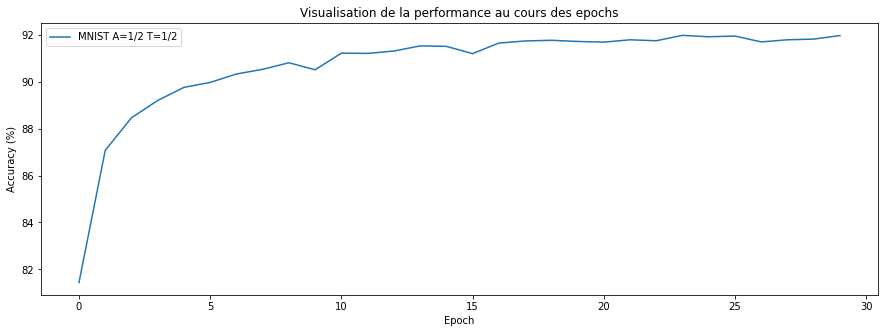

In [6]:
# plotting
plt.figure(1,figsize=(15,5))
plt.plot(x, np_results_mnist_1)
plt.legend(('MNIST A=1/2 T=1/2', 'MNIST A=2/3 T=1/3', 'MNIST Fold-3 A=2/3 T=1/3'),loc='upper left')
plt.title('Visualisation de la performance au cours des epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.show()

Nous constatons alors que lors des 5 premières epochs, nous avons une progression fulgurante des résultats, puis que notre modèle tend vers 92% en progressant très lentement.

### Base d'apprentissage 2/3 vs base de test 1/3

Dans un second temps, nous chargeons les données. Puis réduisons la liste de base d'entrainement à 20 000 images, afin d'obtenir une répartition de A=2/3 et T=1/3.

In [7]:
training_data_2, validation_data, test_data = mnist_loader.load_data_wrapper(20000)

Nous effectuons alors l'entrainement avec ces jeux de données.

In [8]:
net = net1.Network(layers)
results_mnist_2 = net.SGD(training_data_2, epochs, mini_batch_size, 3.0, test_data=test_data)

Epoch 0 : 80.10000000000001 %
Epoch 1 : 82.16 %
Epoch 2 : 82.78999999999999 %
Epoch 3 : 83.48 %
Epoch 4 : 83.81 %
Epoch 5 : 91.27 %
Epoch 6 : 92.21000000000001 %
Epoch 7 : 92.65 %
Epoch 8 : 92.55 %
Epoch 9 : 92.86 %
Epoch 10 : 92.78 %
Epoch 11 : 92.7 %
Epoch 12 : 92.91 %
Epoch 13 : 92.94 %
Epoch 14 : 93.07 %
Epoch 15 : 93.16 %
Epoch 16 : 93.22 %
Epoch 17 : 93.02 %
Epoch 18 : 93.24 %
Epoch 19 : 93.37 %
Epoch 20 : 93.28999999999999 %
Epoch 21 : 93.45 %
Epoch 22 : 93.39 %
Epoch 23 : 93.52000000000001 %
Epoch 24 : 93.26 %
Epoch 25 : 93.45 %
Epoch 26 : 93.32000000000001 %
Epoch 27 : 93.47 %
Epoch 28 : 93.53 %
Epoch 29 : 93.57 %


Nous convertissons alors les résultats en un array numpy pour qu'il puisse être affiché dans un plot.

In [9]:
np_results_mnist_2 = np.array(results_mnist_2)

Et affichons les résultats sous la forme d'une courbe afin de visualiser son évolution. Et la comparer avec celle précédente.

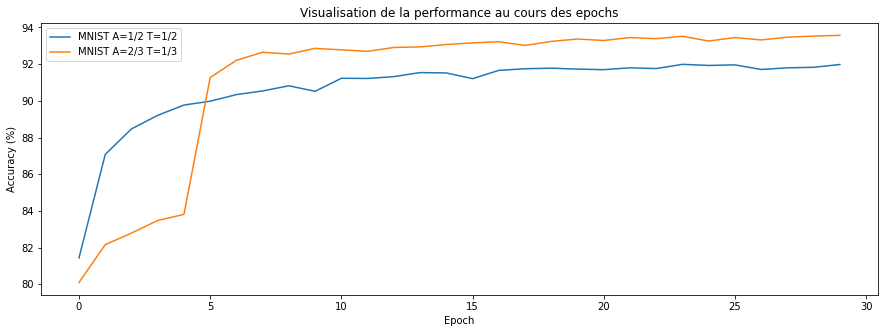

In [10]:
# plotting

plt.figure(2,figsize=(15,5))
plt.plot(x, np_results_mnist_1)
plt.plot(x, np_results_mnist_2)
plt.legend(('MNIST A=1/2 T=1/2', 'MNIST A=2/3 T=1/3', 'MNIST Fold-3 A=2/3 T=1/3'),loc='upper left')
plt.title('Visualisation de la performance au cours des epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.show()

Comme pour les résultats précèdent, nous obtenons une grande progression lors des 5 premières epochs, puis le modèle tend vers 94%. Avec une répartition A=2/3 et T=1/3, nous obtenons de meilleurs résultats qu'avec une répartition A=1/2 et T=1/2. Ce n'est cependant pas une grande surprise, puisqu'en effet, le modèle ayant plus de données pour son apprentissage, elle améliore celui-ci.

### 3-fold validation croisée (A = 2/3 vs T = 1/3)

La valisation croisée 3-fold (A = 2/3 vs T = 1/3), signifie que l'on divise un ensemble de donnée en trois parties de taille identique {B, C, D}, et que l'on en utilisera deux pour l'apprentissage et un pour le test.
On effectue alors trois fois apprentissage :
- La première fois avec : A = {B, C} et T = {D}
- La deuxième fois avec : A = {C, D} et T = {B}
- La troisième fois avec : A = {B, D} et T = {C}

Nous réduisons alors le nombre d'epochs à 10 par itération afin de pouvoir comparer les résultats avec les résultats précèdents.
Dans un premier temps, nous préparons les divisions les données en trois groupes {B, C, D}.
Nous effetuons alors trois fois l'apprentissage avec les groupements de données différents puis ajoutons les résultats ensemble dans une même liste.

In [11]:
results_3 = []
net = net1.Network(layers)
k=3
epochs=10 #10x3 = 30

# prepare data
tr_d, va_d, te_d = mnist_loader.load_data()

for i in range(0, k):
    B = [np.reshape(x, (784, 1)) for x in tr_d[0]][0:10000]
    B_expected_result = [mnist_loader.vectorized_result(y) for y in tr_d[1]][0:10000]
    B_test_data = tr_d[1][0:10000]

    C = [np.reshape(x, (784, 1)) for x in tr_d[0]][10000:20000]
    C_expected_result = [mnist_loader.vectorized_result(y) for y in tr_d[1]][10000:20000]
    C_test_data = tr_d[1][10000:20000]

    D = [np.reshape(x, (784, 1)) for x in tr_d[0]][20000:30000]
    D_expected_result = [mnist_loader.vectorized_result(y) for y in tr_d[1]][20000:30000]
    D_test_data = tr_d[1][20000:30000]
    if i == 0:
        # A = {B, C} & T = {D}
        B.extend(C)
        B_expected_result.extend(C_expected_result)
        training_data = zip(B, B_expected_result)
        test_data = zip(D, D_test_data)
    if i == 1:
        # A = {C, D} & T = {B}
        C.extend(D)
        C_expected_result.extend(D_expected_result)
        training_data = zip(C, C_expected_result)
        test_data = zip(B, B_test_data)
    if i == 2:
        # A = {B, D} & T = {C}
        B.extend(D)
        B_expected_result.extend(D_expected_result)
        training_data = zip(B, B_expected_result)
        test_data = zip(C, C_test_data)
        
    print("Fold ", i)
    results_mnist_3 = net.SGD(training_data, epochs, mini_batch_size, 3.0, test_data=test_data)
    results_3.extend(results_mnist_3)

Fold  0
Epoch 0 : 76.71 %
Epoch 1 : 88.64999999999999 %
Epoch 2 : 88.75 %
Epoch 3 : 90.60000000000001 %
Epoch 4 : 91.09 %
Epoch 5 : 91.36 %
Epoch 6 : 91.47 %
Epoch 7 : 91.55 %
Epoch 8 : 91.97 %
Epoch 9 : 92.01 %
Fold  1
Epoch 0 : 94.89 %
Epoch 1 : 95.28999999999999 %
Epoch 2 : 94.78 %
Epoch 3 : 94.86 %
Epoch 4 : 94.98 %
Epoch 5 : 94.03 %
Epoch 6 : 94.74000000000001 %
Epoch 7 : 94.56 %
Epoch 8 : 94.51 %
Epoch 9 : 94.87 %
Fold  2
Epoch 0 : 95.91 %
Epoch 1 : 95.8 %
Epoch 2 : 95.78 %
Epoch 3 : 95.76 %
Epoch 4 : 95.50999999999999 %
Epoch 5 : 95.63000000000001 %
Epoch 6 : 95.85000000000001 %
Epoch 7 : 95.54 %
Epoch 8 : 95.53 %
Epoch 9 : 95.50999999999999 %


Nous convertissons alors les résultats en un array numpy pour qu'il puisse être affiché dans un plot.

In [12]:
np_results_mnist_3 = np.array(results_3)

Et affichons les résultats sous la forme d'une courbe afin de visualiser son évolution. Et la comparer avec celles précédentes.

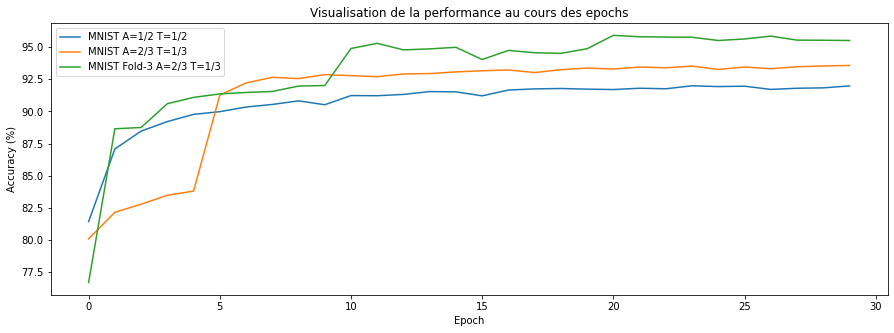

In [13]:
# plotting
plt.figure(3,figsize=(15,5))
plt.plot(x, np_results_mnist_1)
plt.plot(x, np_results_mnist_2)
plt.plot(x, np_results_mnist_3)
plt.legend(('MNIST A=1/2 T=1/2', 'MNIST A=2/3 T=1/3', 'MNIST Fold-3 A=2/3 T=1/3'),loc='upper left')
plt.title('Visualisation de la performance au cours des epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.show()

### Conclusion

Nous visualisons dans le graphique précèdent que le nombre de données pour l'apprentissage affecte la performance du modèle puisque nous obtenons de meilleurs résultats avec la répartition A=2/3 T=1/3 que A=1/2 T=1/2.
Nous visualisons également que lorsque l'on garde la répartition A=2/3 T=1/3, mais avec une valisation croisée 3-fold, nous obtenons encore un meilleur résultat puisque nous atteignons les 95% de succès. Nous visualisons également que lorsque l'on passe d'un k à un autre, nous avons un bon dans notre pourcentage de succès.

## Classification des données MNIST avec convulution.

Afin de pouvoir comparer les performances des différentes répartitions entre les bases d'apprentissage et de test, nous prenons un nombre d'epoch de 30.

In [14]:
epochs = 30
mini_batch_size = 10

# Axe x des plots.
x = np.array(list(range(0, epochs)))

### Base d'apprentissage 1/2 vs base de test 1/2

Dans un premier temps, nous chargeons les données. Puis réduisons la liste de base d'entrainement à 10 000 images, afin d'obtenir une répartition de A=1/2 et T=1/2.

In [15]:
training_data_4, validation_data, test_data = net3.load_data_shared()

t_x, t_y = training_data_4
l = t_x.get_value()
l = l[0:10000]
t_x.set_value(l)
training_data_4 = (t_x, t_y)

Nous effectuons alors l'entrainement avec ces jeux de données.

In [16]:
net = net3.Network([
    net3.FullyConnectedLayer(n_in=784, n_out=100),
    net3.SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
results_convolution_1 = net.SGD(training_data_4, epochs, mini_batch_size, 0.1, validation_data, test_data)

Epoch 0: 88.58%
Epoch 1: 90.50%
Epoch 2: 91.17%
Epoch 3: 91.60%
Epoch 4: 92.08%
Epoch 5: 92.39%
Epoch 6: 92.87%
Epoch 7: 93.16%
Epoch 8: 93.43%
Epoch 9: 93.56%
Epoch 10: 93.81%
Epoch 11: 93.99%
Epoch 12: 94.17%
Epoch 13: 94.24%
Epoch 14: 94.35%
Epoch 15: 94.48%
Epoch 16: 94.55%
Epoch 17: 94.63%
Epoch 18: 94.66%
Epoch 19: 94.69%
Epoch 20: 94.80%
Epoch 21: 94.84%
Epoch 22: 94.90%
Epoch 23: 94.91%
Epoch 24: 94.99%
Epoch 25: 95.03%
Epoch 26: 95.05%
Epoch 27: 95.07%
Epoch 28: 95.06%
Epoch 29: 95.08%
Finished training network.


Nous convertissons alors les résultats en un array numpy pour qu'il puisse être affiché dans un plot.

In [17]:
np_results_convolution_1 = np.array(results_convolution_1)

Et affichons les résultats sous la forme d'une courbe afin de visualiser son évolution.

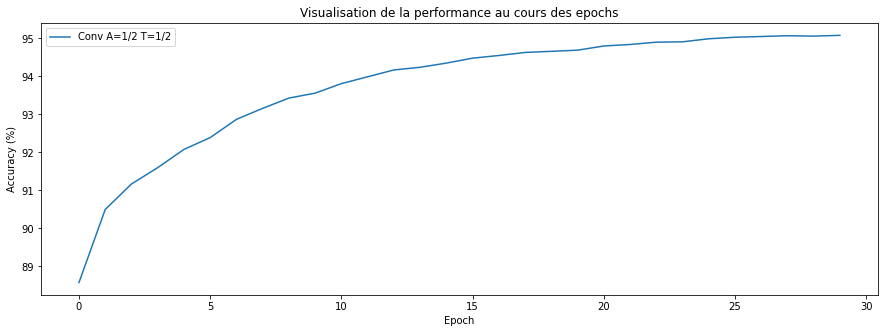

In [18]:
# plotting
plt.figure(4,figsize=(15,5))
plt.plot(x, np_results_convolution_1)
plt.legend(('Conv A=1/2 T=1/2', 'Conv A=2/3 T=1/3', 'Conv Fold-3 A=2/3 T=1/3'),loc='upper left')
plt.title('Visualisation de la performance au cours des epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.show()

Nous visualisons que le pourcentage de performance est de plus en plus bon et évolue tout au long des 30 epochs, jusqu'à atteindre 95%.

### Base d'apprentissage 2/3 vs base de test 1/3

Dans un second temps, nous chargeons les données. Puis réduisons la liste de base d'entrainement à 20 000 images, afin d'obtenir une répartition de A=2/3 et T=1/3.

In [19]:
training_data_5, validation_data, test_data = net3.load_data_shared()

t_x, t_y = training_data_5
l = t_x.get_value()
l = l[0:20000]
t_x.set_value(l)
training_data_5 = (t_x, t_y)

Nous effectuons alors l'entrainement avec ces jeux de données.

In [20]:
net = net3.Network([
    net3.FullyConnectedLayer(n_in=784, n_out=100),
    net3.SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
results_convolution_2 = net.SGD(training_data_5, epochs, mini_batch_size, 0.1, validation_data, test_data)

Epoch 0: 90.49%
Epoch 1: 91.88%
Epoch 2: 93.02%
Epoch 3: 93.60%
Epoch 4: 94.30%
Epoch 5: 94.70%
Epoch 6: 94.97%
Epoch 7: 95.22%
Epoch 8: 95.44%
Epoch 9: 95.64%
Epoch 10: 95.80%
Epoch 11: 95.94%
Epoch 12: 95.98%
Epoch 13: 96.09%
Epoch 14: 96.12%
Epoch 15: 96.15%
Epoch 16: 96.19%
Epoch 17: 96.21%
Epoch 18: 96.21%
Epoch 19: 96.22%
Epoch 20: 96.24%
Epoch 21: 96.30%
Epoch 22: 96.35%
Epoch 23: 96.36%
Epoch 24: 96.38%
Epoch 25: 96.41%
Epoch 26: 96.41%
Epoch 27: 96.45%
Epoch 28: 96.51%
Epoch 29: 96.53%
Finished training network.


Nous convertissons alors les résultats en un array numpy pour qu'il puisse être affiché dans un plot.

In [21]:
np_results_convolution_2 = np.array(results_convolution_2)

Et affichons les résultats sous la forme d'une courbe afin de visualiser son évolution. Et de le comparer avec les résultats antérieurs.

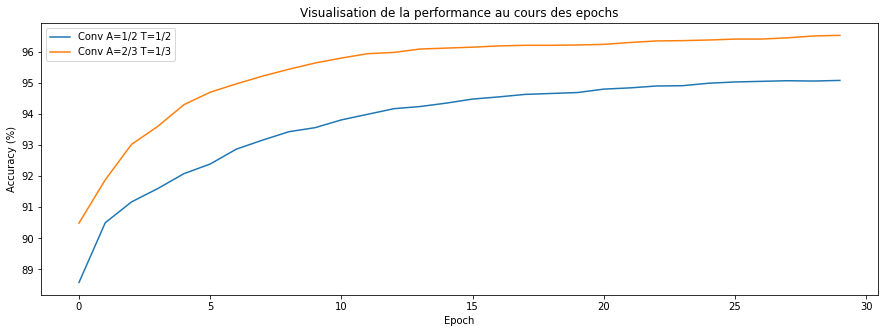

In [22]:
# plotting
plt.figure(5,figsize=(15,5))
plt.plot(x, np_results_convolution_1)
plt.plot(x, np_results_convolution_2)
plt.legend(('Conv A=1/2 T=1/2', 'Conv A=2/3 T=1/3', 'Conv Fold-3 A=2/3 T=1/3'),loc='upper left')
plt.title('Visualisation de la performance au cours des epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.show()

Nous visualisons une augmentation des performances presque identique entre les deux courbes. La répartition A=2/3 T=1/3 a cependant de meilleurs résultats que la répartition A=1/2 T=1/2 ce qui n'est toujours pas surprenant. Nous atteignons 97%.

### 3-fold validation croisée (A = 2/3 vs T = 1/3)

La valisation croisée 3-fold (A = 2/3 vs T = 1/3), signifie que l'on divise un ensemble de donnée en trois parties de taille identique {B, C, D}, et que l'on en utilisera deux pour l'apprentissage et un pour le test. On effectue alors trois fois apprentissage :

La première fois avec : A = {B, C} et T = {D}
La deuxième fois avec : A = {C, D} et T = {B}
La troisième fois avec : A = {B, D} et T = {C}
Nous réduisons alors le nombre d'epochs à 10 par itération afin de pouvoir comparer les résultats avec les résultats précèdents. Dans un premier temps, nous préparons les divisions les données en trois groupes {B, C, D}. Nous effetuons alors trois fois l'apprentissage avec les groupements de données différents puis ajoutons les résultats ensemble dans une même liste.

In [23]:
import theano
import theano.tensor as T

def shared(data):
    """Place the data into shared variables.  This allows Theano to copy
    the data to the GPU, if one is available.

    """
    shared_x = theano.shared(
        np.asarray(data[0], dtype=theano.config.floatX), borrow=True)
    shared_y = theano.shared(
        np.asarray(data[1], dtype=theano.config.floatX), borrow=True)
    return shared_x, T.cast(shared_y, "int32")

In [24]:
results_6 = []
net = net3.Network([
    net3.FullyConnectedLayer(n_in=784, n_out=100),
    net3.SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
k=3
epochs=10 #10x3 = 30

for i in range(0, k):
    #Récupérer les données
    training_data, validation_data, test_data = net3.load_data()
    training_data_0 = training_data[0]
    training_data_1 = training_data[1]

    B_0 = training_data_0[0:10000]
    B_1 = training_data_1[0:10000]
    C_0 = training_data_0[10000:20000]
    C_1 = training_data_1[10000:20000]
    D_0 = training_data_0[20000:30000]
    D_1 = training_data_1[20000:30000]
    if k == 0:
        # A = {B, C} & T = {D}
        np.array(list(B_0).extend(list(C_0)))
        np.array(list(B_1).extend(list(C_1)))
        training_data = (B_0, B_1)
        test_data = (D_0, D_1)
    if k == 1:
        # A = {C, D} & T = {B}
        np.array(list(C_0).extend(list(D_0)))
        np.array(list(C_1).extend(list(D_1)))
        training_data = (C_0, C_1)
        test_data = (B_0, B_1)
    if k == 2:
        # A = {B, D} & T = {C}
        np.array(list(B_0).extend(list(D_0)))
        np.array(list(B_1).extend(list(D_1)))
        training_data = (B_0, B_1)
        test_data = (C_0, C_1)
        
    results_convolution_3 = net.SGD(shared(training_data), epochs, mini_batch_size, 0.1, shared(validation_data), shared(test_data))
    results_6.extend(results_convolution_3)

Epoch 0: 92.61%
Epoch 1: 94.50%
Epoch 2: 95.65%
Epoch 3: 96.20%
Epoch 4: 96.45%
Epoch 5: 96.75%
Epoch 6: 96.97%
Epoch 7: 97.13%
Epoch 8: 97.21%
Epoch 9: 97.30%
Finished training network.
Epoch 0: 97.41%
Epoch 1: 97.50%
Epoch 2: 97.54%
Epoch 3: 97.61%
Epoch 4: 97.61%
Epoch 5: 97.66%
Epoch 6: 97.67%
Epoch 7: 97.73%
Epoch 8: 97.75%
Epoch 9: 97.78%
Finished training network.
Epoch 0: 97.83%
Epoch 1: 97.79%
Epoch 2: 97.83%
Epoch 3: 97.80%
Epoch 4: 97.85%
Epoch 5: 97.86%
Epoch 6: 97.86%
Epoch 7: 97.86%
Epoch 8: 97.86%
Epoch 9: 97.86%
Finished training network.


SyntaxError: 'return' outside function (2604169385.py, line 42)

Nous convertissons alors les résultats en un array numpy pour qu'il puisse être affiché dans un plot.

In [25]:
np_results_convolution_3 = np.array(results_6)

Et affichons les résultats sous la forme d'une courbe afin de visualiser son évolution. Et de le comparer avec les résultats antérieurs.

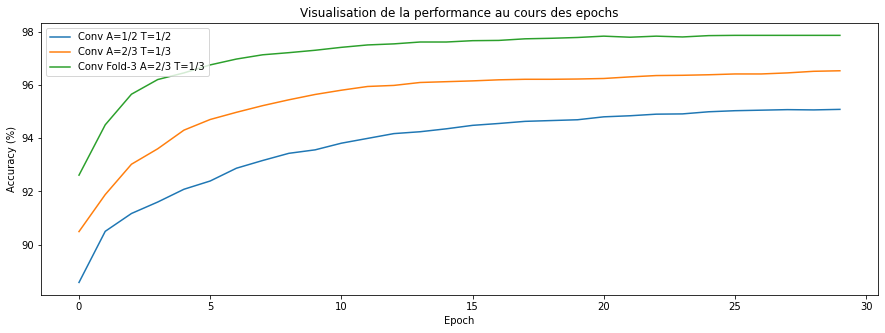

In [26]:
# plotting
plt.figure(6,figsize=(15,5))
plt.plot(x, np_results_convolution_1)
plt.plot(x, np_results_convolution_2)
plt.plot(x, np_results_convolution_3)
plt.legend(('Conv A=1/2 T=1/2', 'Conv A=2/3 T=1/3', 'Conv Fold-3 A=2/3 T=1/3'),loc='upper left')
plt.title('Visualisation de la performance au cours des epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.show()

### Conclusion

Nous visualisons dans le graphique précèdent que le nombre de données pour l'apprentissage affecte la performance du modèle puisque nous obtenons de meilleurs résultats avec la répartition A=2/3 T=1/3 que A=1/2 T=1/2. Nous visualisons également que lorsque l'on garde la répartition A=2/3 T=1/3, mais avec une valisation croisée 3-fold, nous obtenons encore un meilleur résultat puisque nous atteignons les 98% de succès. 

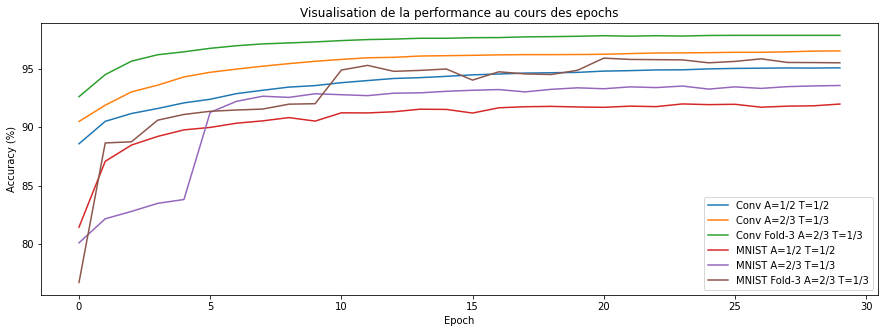

In [29]:
# plotting
plt.figure(7,figsize=(15,5))
plt.plot(x, np_results_convolution_1)
plt.plot(x, np_results_convolution_2)
plt.plot(x, np_results_convolution_3)
plt.plot(x, np_results_mnist_1)
plt.plot(x, np_results_mnist_2)
plt.plot(x, np_results_mnist_3)
plt.legend(('Conv A=1/2 T=1/2', 'Conv A=2/3 T=1/3', 'Conv Fold-3 A=2/3 T=1/3', 'MNIST A=1/2 T=1/2', 'MNIST A=2/3 T=1/3', 'MNIST Fold-3 A=2/3 T=1/3'),loc='lower right')
plt.title('Visualisation de la performance au cours des epochs')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.show()

Nous visualisons en comparant tous les résultats que la convolution est globalement plus efficac